First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000 

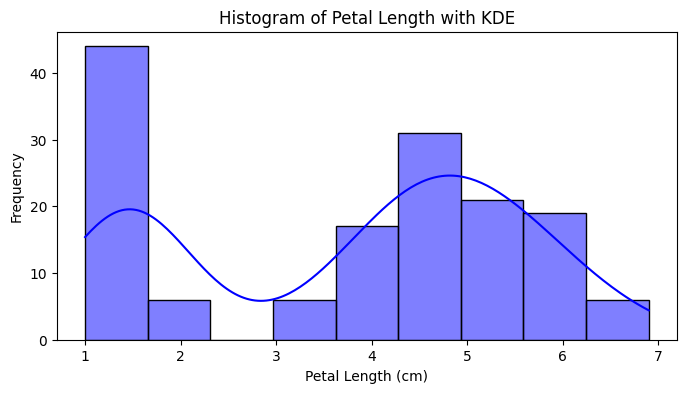

/tmp/ipykernel_32160/2572251292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_area', data=df, palette='Set2')


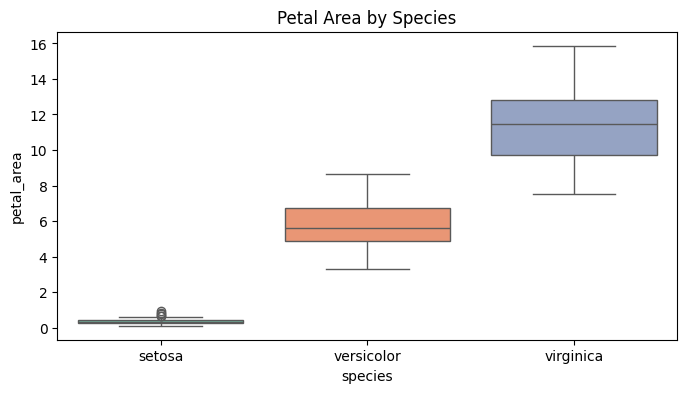

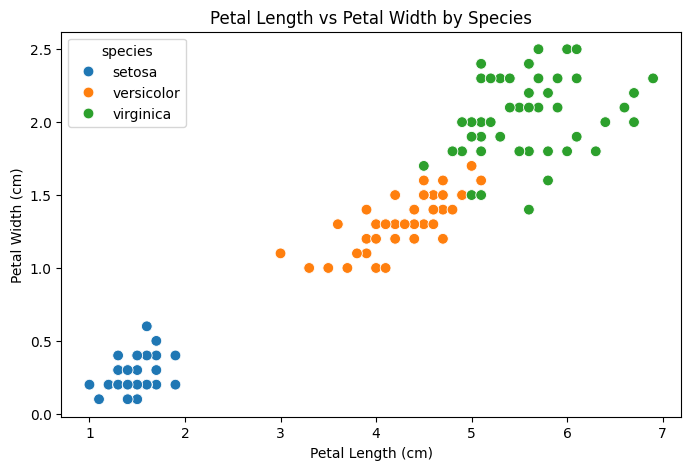

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Iris from seaborn - no file needed)
df = sns.load_dataset('iris')

# Basic exploration
print("First 5 rows:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# (For demonstration, fill missing values with median if there were any)
# df.fillna(df.median(numeric_only=True), inplace=True)

# Feature engineering: add petal area feature
df['petal_area'] = df['petal_length'] * df['petal_width']

# Group by species and aggregate mean of numeric columns including petal_area
grouped = df.groupby('species').mean(numeric_only=True)
print("\nGrouped mean values by species:")
print(grouped)

# Export the grouped data to CSV
grouped.to_csv('grouped_iris.csv', index=True)

# Visualizations

# 1. Histogram of petal length
plt.figure(figsize=(8, 4))
sns.histplot(df['petal_length'], kde=True, color='blue')
plt.title('Histogram of Petal Length with KDE')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of petal area by species
plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='petal_area', data=df, palette='Set2')
plt.title('Petal Area by Species')
plt.show()

# 3. Scatter plot of petal length vs petal width, colored by species
plt.figure(figsize=(8, 5))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, s=60)
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()